In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

# Problem 7.2

## part (a)

In [10]:
dataset = np.loadtxt("sunspots.txt")

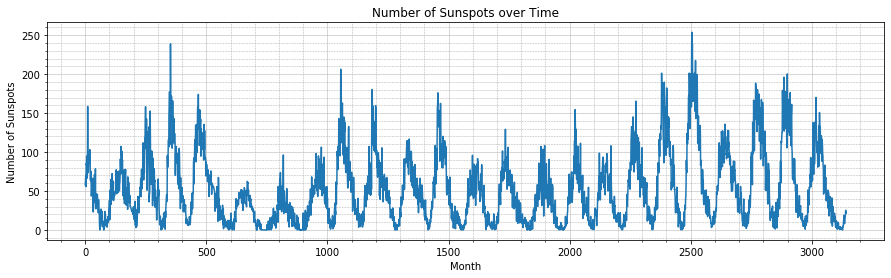

In [19]:
fig = plt.figure()
fig.set_size_inches(15,4)
ax = fig.add_subplot()
ax.plot(dataset[:,0], dataset[:,1])
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sunspots")
ax.set_title("Number of Sunspots over Time")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

## part (b)

In [9]:
def c_k(data, k):
    N = data.shape[0]
    n = np.arange(0, N)
    return (data*np.exp(-1j*2*np.pi*k*n / N)).sum()

In [24]:
coeffs = np.array([c_k(dataset[:, 1], k) for k in range(101)][1:])

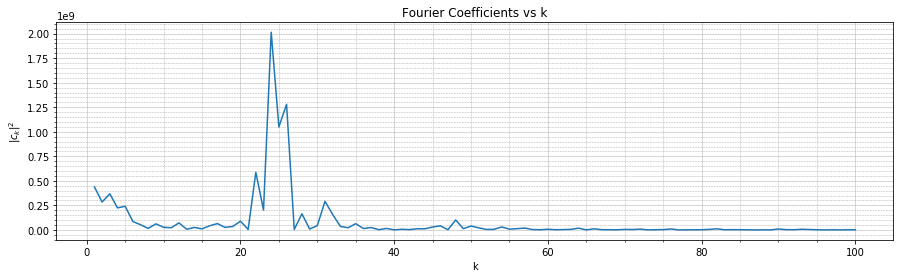

In [26]:
fig = plt.figure()
fig.set_size_inches(15,4)
ax = fig.add_subplot()
ax.plot(np.arange(coeffs.shape[0])+1, (coeffs*coeffs.conjugate()).real)
ax.set_xlabel("k")
ax.set_ylabel("$|c_k|^2$")
ax.set_title("Fourier Coefficients vs k")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

## part (c)

In [28]:
k_max = np.argmax((coeffs*coeffs.conjugate()).real) + 1
k_max

24

This corresponds to a sine wave of $\sin\left(\frac{2\pi k t}{N}\right)$ which has period $T = 2\pi \frac{N}{2\pi k} = \frac{N}{k}$

In [30]:
T = dataset.shape[0] / k_max
T

130.95833333333334

# Problem 7.9

## part (a)

In [42]:
image_data = np.loadtxt("blur.txt")
image_data.shape

(1024, 1024)

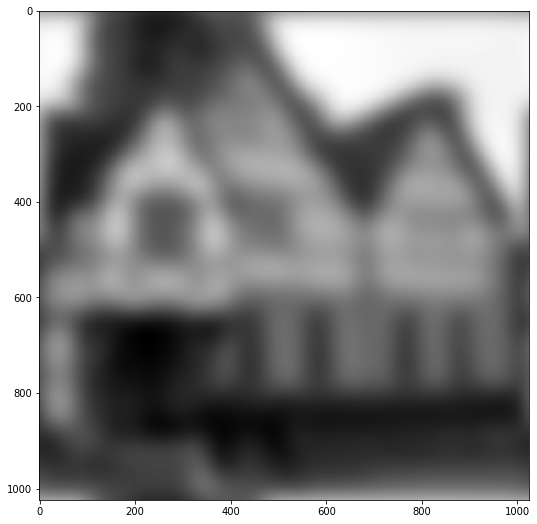

In [50]:
fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot()
ax.imshow(image_data, cmap='gray')

## part (b)

In [47]:
def f(x,y, sigma=25, L=1024):
    return np.exp(-((x)**2 + (y)**2)/(2*sigma**2)) \
            + np.exp(-((x - L)**2 + (y)**2)/(2*sigma**2)) \
            + np.exp(-((x)**2 + (y - L)**2)/(2*sigma**2)) \
            + np.exp(-((x - L)**2 + (y - L)**2)/(2*sigma**2))

In [48]:
x = np.arange(0, image_data.shape[0])
y = np.arange(0, image_data.shape[1])
xx, yy = np.meshgrid(x,y)
z = f(xx,yy)

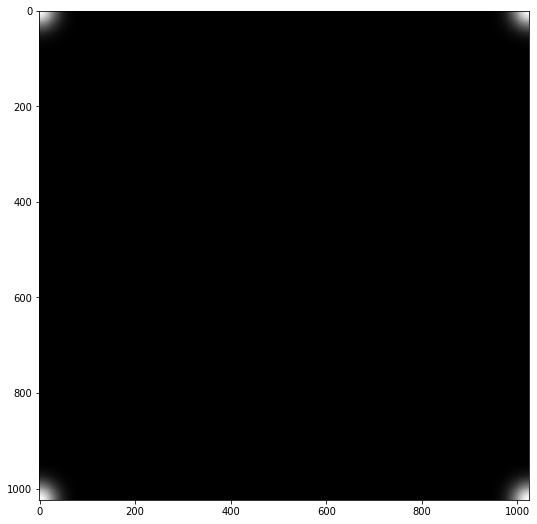

In [51]:
fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot()
ax.imshow(z, cmap='gray')

## part (c)

In [95]:
def deconvolution(datafile):
    image_data = np.loadtxt(datafile)
    L = image_data.shape[0]
    def f(x,y, sigma=25, L=L):
        return np.exp(-((x)**2 + (y)**2)/(2*sigma**2)) \
                + np.exp(-((x - L)**2 + (y)**2)/(2*sigma**2)) \
                + np.exp(-((x)**2 + (y - L)**2)/(2*sigma**2)) \
                + np.exp(-((x - L)**2 + (y - L)**2)/(2*sigma**2))
    
    x = np.arange(0, image_data.shape[0])
    y = np.arange(0, image_data.shape[1])
    xx, yy = np.meshgrid(x,y)
    z = f(xx,yy)
    
    ft_image = np.fft.rfft2(image_data)
    ft_z = np.fft.rfft2(z)
    ft_z[abs(ft_z) < 1e-3] = 1e-3
    
    ft_sharper_image = ft_image / (L*L * ft_z)
    return np.fft.irfft2(ft_sharper_image)

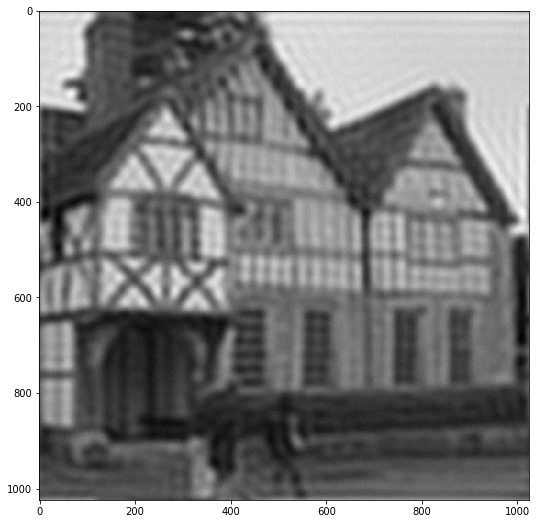

In [96]:
sharpened_image = deconvolution("blur.txt")

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot()
ax.imshow(sharpened_image, cmap='gray')